Environment:
- windows
- python 3.6.0

In [78]:
print('test')

test


import model, define global params.

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, roc_curve, auc,accuracy_score

iteration_times = 500   # iteration times
train_valid_ratio = 0.8   # determine the ratio of train to validation data

**step 1:** load australian dataset by load_svmlight_file function, and print data and label shape

In [80]:
australian = load_svmlight_file('E:/Master/personal/实验和作业/机器学习/data/australian_scale.svm')
print('data shape:', australian[0].shape, '----label shape:', australian[1].shape)

data shape: (690, 14) ----label shape: (690,)


**step 2:** split all data into train and validation by train_test_split with the train_valid_ratio

In [81]:
def prepare_data(x, y, train_test_ratio = train_valid_ratio, shuffle = False):
    x_train, x_valid, y_train, y_valid = train_test_split(x, y,
                            train_size=train_valid_ratio, test_size=1-train_valid_ratio, shuffle=shuffle)   # point out the test size
    # print('train data shape:', x_train.shape, '---validation data shape:', x_valid.shape)
    return x_train, x_valid, y_train, y_valid

**step 3:** svm model, initial params with normal distribution, weight matrix and bias term
- w * x's shape is equal to label shape.

In [82]:
def norm_weight(nin, scale = 0.01):
    """
    weight initializer, defalt scale 0.01
    """
    w = scale * np.random.randn(nin)
    b = scale * np.random.randn()
    # print('weight shape:', w.shape)
    return w, b

**step 4-8:** choose loss function, calculate gradient and update params
- using svm model and hinge loss function.
- gradient descent, compute and update the gradient of weight and bias.

In [83]:
def linear_model(x, w, b,thred):
    try:
        y_prob = x*w + b
        # judge the class of linear model
        y = np.array([0]*y_prob.shape[0])
        y[y_prob < thred] = -1
        y[y_prob > thred] = 1
        return y, y_prob
    except Exception as e:
        print("x don't match w...")

def loss_function(y, y_pred):
    hinge = np.max([[0]*y.shape[0],1 - y*y_pred], axis=0)
    return np.sum(hinge) + 0.5*np.square(w)    # use hinge loss function

def update_params(x, y, y_pred, w, b, alpha):
    # use square loss function, update w and b by its gradient
    w = w + alpha*y[y * y_pred < 1]*x[y * y_pred < 1]
    b = b + alpha*np.sum(y[y * y_pred < 1])
    return w, b     

**step 9-1:** run step 4-8 iteratively, beside that, we can adjust some hyper params.

In [104]:
alpha = [0.3, 0.1, 0.01]    # different learning rate
threshold = 0.5    # when > 0.5 is +1, < 0.5 is -1
x_train, x_valid, y_train, y_valid = prepare_data(australian[0], australian[1])   # prepare train and test data
train_total_loss = []    # train loss value
valid_total_loss = []    # test loss value

# iteration with different learning rate
for a in alpha:
    train_loss = []
    valid_loss = []
    train_accu = []
    valid_accu = []
    w, b = norm_weight(x_train.shape[1])    # initialize weight and bias
    for i in range(iteration_times):
        # linear model, and train loss
        y_pred, y_prob = linear_model(x_train, w, b, threshold)
        loss_t = loss_function(y_train, y_prob)    # square loss function of train data
        train_loss.append(loss_t)
        train_accu.append(accuracy_score(y_train, y_pred))

        # linear model, and validation loss
        y_valid_pred, y_valid_prob = linear_model(x_valid, w, b, threshold)
        loss_v = loss_function(y_valid, y_valid_prob)  # square loss function of validation data
        valid_loss.append(loss_v)
        valid_accu.append(accuracy_score(y_valid, y_valid_pred))

        #if i % (iteration_times/2) == 0:  # print info
           # print('alpha:', a, 'iteration:', i)

        w, b = update_params(x_train, y_train, y_pred, w, b, a)
    
    print('learning rate:', a, "---max train accuracy:", max(train_accu), '--max valid accuracy:', max(valid_accu))  
    train_total_loss.append(train_loss)
    valid_total_loss.append(valid_loss)

learning rate: 0.3 ---max train accuracy: 0.884057971014 --max valid accuracy: 0.891304347826
learning rate: 0.1 ---max train accuracy: 0.885869565217 --max valid accuracy: 0.905797101449
learning rate: 0.01 ---max train accuracy: 0.885869565217 --max valid accuracy: 0.898550724638


**step 9-2:** eval result by auc and f1

In [85]:
def eval_auc(y, y_pred_prob):
    pass

def eval_f1(y, y_pred):
    pass

**step 9-3:** draw the graph of train and validation loss 

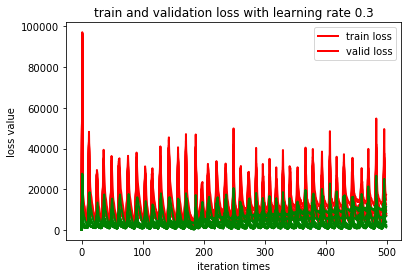

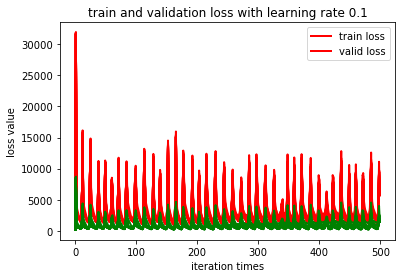

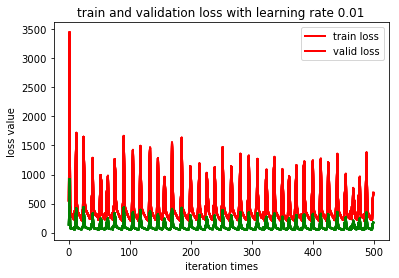

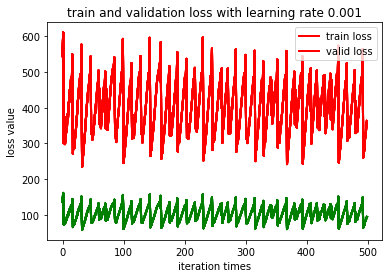

In [103]:
# plot params
fig_config = {    # train line
    'label':['train loss', 'valid loss'],     # validation line
    'color': ['r', 'g'],
}

# train loss plt with different alpha
for i in range(len(alpha)):
    plt.figure()
    plt.title('train and validation loss with learning rate '+ str(alpha[i]))
    plt.plot(range(len(train_total_loss[i])), train_total_loss[i], linewidth=2.0, 
             color=fig_config['color'][0] )
    plt.plot(range(len(valid_total_loss[i])), valid_total_loss[i], linewidth=2.0, 
             color=fig_config['color'][1])
    plt.xlabel('iteration times')
    plt.ylabel('loss value')
    plt.legend(fig_config['label'])
    plt.show()